# Question 1: Probability Tables for Markov Chains (60pt)

A Markov Chain defines a probability distribution over sequences by defining a state transition probability matrix. That is, the state transition matrix defines a conditional probability table $p(s_{t+1}|s_t)$, where $s_t \in \{1, \dots, K \}$ is the state of the Markov chain at time $t$.

## Question 1a: Define the transition matrix (20pt)

Define a state transition matrix of size 5 such that
$$p(s_{t+1}=i | s_t = j) = 1-\epsilon, \; \text{for}  \; \; i = j,$$
$$p(s_{t+1}=mod(i+1, 5) | s_t = i) =\epsilon,$$
$$p(s_{t+1}= i | s_t = j) = 0 \; \text{for} \; \; i \neq j.$$
Example: If you are at state $s_t = 1$. The probability of staying at the same state such that $s_{t+1}=1$ is $1-\epsilon$ and transitioning to $s_{t+1}=2$ is $\epsilon$, and there is no chance of transitioning to $s_{t+1}=3$, or further. When you reach state 5, there is only chance of either staying at the same state, or going back to state 1.

Define this conditional probability matrix in a matrix such that columns give the next state probabilities. Set $\epsilon = 0.2$. Print the result with the `print()` function.

Hint: Use `torch.eye(5)` to make things easier.

##############################################

# Question 1 : Tableaux de probabilité pour les chaînes de Markov (60 pt)

Une chaîne de Markov définit une distribution de probabilité sur des séquences en définissant une matrice de probabilité de transition d'état. Autrement dit, la matrice de transition d'état définit une table de probabilité conditionnelle $p(s_{t+1}|s_t)$, où $s_t \in \{1, \dots, K \}$ est l'état de la chaîne de Markov à temps $t$.

## Question 1a : Définir la matrice de transition (20pt)

Définir une matrice de transition d'état de taille 5 telle que
$$p(s_{t+1}=i | s_t = j) = 1-\epsilon, \; \text{pour} \; \; i = j,$$
$$p(s_{t+1}=mod(i+1, 5) | s_t = i) =\epsilon,$$
$$p(s_{t+1}= i | s_t = j) = 0 \; \text{pour} \; \; i \neq j.$$
Exemple : Si vous êtes à l'état $s_t = 1$. La probabilité de rester dans le même état tel que $s_{t+1}=1$ est $1-\epsilon$ et de passer à $s_{t+1}=2$ est $\epsilon$, et il n'y a pas chance de passer à $s_{t+1}=3$, ou plus. Lorsque vous atteignez l’état 5, il n’y a qu’une seule chance soit de rester dans le même état, soit de revenir à l’état 1.

Définissez cette matrice de probabilité conditionnelle dans une matrice telle que les colonnes donnent les probabilités d'état suivantes. Définissez $\epsilon = 0.2$. Imprimez le résultat avec la fonction `print()`.

Astuce : utilisez `torch.eye(5)` pour rendre les choses plus faciles.



In [2]:
import torch

##### travaillez ici

EPSILON = 0.2
transition_matrix = torch.eye(5) * (1 - EPSILON)
for i in range(5):
    transition_matrix[i, (i + 1) % 5] = EPSILON
print(transition_matrix)


tensor([[0.8000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8000, 0.2000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.8000, 0.2000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.8000, 0.2000],
        [0.2000, 0.0000, 0.0000, 0.0000, 0.8000]])


# Question 1b: Plot $p(s_{t+1})$ (30pt)

Note that $p(s_{t+1}) = \sum_{s_t} p(s_{t+1} | s_t) p(s_t)$. Having this in mind, start from  $p(s_t) = [1, 0, 0 ,0 ,0]$, and plot the evolution of the vector $p(s_{t+1})$ across time (for $t \in \{0, \dots, 30 \})$.

Hint: For plotting, you can use `plot.imshow()` or `plt.plot()`. For `plt.plot`, you can input of a matrix of size $31 \times 5$.

#################################

Notez que $p(s_{t+1}) = \sum_{s_t} p(s_{t+1} | s_t) p(s_t)$. En gardant cela à l'esprit, partez de $p(s_t) = [1, 0, 0 ,0 ,0]$ et tracez l'évolution du vecteur $p(s_{t+1})$ dans le temps (pour $t \in \{0, \dots, 30 \})$.

Astuce : Pour le traçage, vous pouvez utiliser `plot.imshow()` ou `plt.plot()`. Pour `plt.plot`, vous pouvez saisir une matrice de taille $31 \times 5$.


Text(0.5, 1.0, 'Evolution of the probabilities of the states over time')

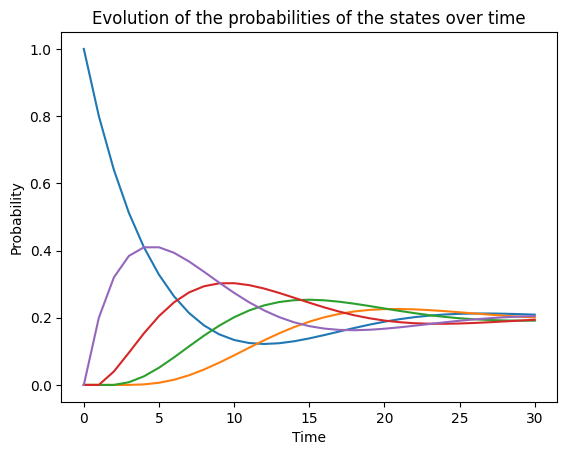

In [3]:
import matplotlib.pyplot as plt

##### travaillez ici
p_0 = torch.tensor([1, 0, 0, 0, 0])
probalities_St1 = torch.zeros((31,5))

for t in range(31):
    if t == 0:
        probalities_St1[t] = p_0
    else:
        probalities_St1[t] =transition_matrix @ probalities_St1[t-1].float() 
        

plt.plot(probalities_St1.numpy())
plt.xlabel('Time')
plt.ylabel('Probability')
plt.title('Evolution of the probabilities of the states over time')


In [4]:
probalities_St1

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.8000, 0.0000, 0.0000, 0.0000, 0.2000],
        [0.6400, 0.0000, 0.0000, 0.0400, 0.3200],
        [0.5120, 0.0000, 0.0080, 0.0960, 0.3840],
        [0.4096, 0.0016, 0.0256, 0.1536, 0.4096],
        [0.3280, 0.0064, 0.0512, 0.2048, 0.4096],
        [0.2637, 0.0154, 0.0819, 0.2458, 0.3933],
        [0.2140, 0.0287, 0.1147, 0.2753, 0.3674],
        [0.1769, 0.0459, 0.1468, 0.2937, 0.3367],
        [0.1507, 0.0661, 0.1762, 0.3023, 0.3047],
        [0.1338, 0.0881, 0.2014, 0.3028, 0.2739],
        [0.1247, 0.1107, 0.2217, 0.2970, 0.2459],
        [0.1219, 0.1329, 0.2367, 0.2868, 0.2217],
        [0.1241, 0.1537, 0.2468, 0.2738, 0.2017],
        [0.1300, 0.1723, 0.2522, 0.2594, 0.1862],
        [0.1385, 0.1883, 0.2536, 0.2447, 0.1749],
        [0.1484, 0.2013, 0.2518, 0.2308, 0.1676],
        [0.1590, 0.2114, 0.2476, 0.2181, 0.1638],
        [0.1695, 0.2187, 0.2417, 0.2073, 0.1628],
        [0.1793, 0.2233, 0.2348, 0.1984, 0.1642],


# Question 1c: Calculate the principal eigenvector of $p(s_{t+1} | s_t)$ (10pt).

Do an eigenanalysis of the matrix $p(s_{t+1} | s_t)$. Verify that $p(s_{30})$, that you calculated in cell above is very close the principal eigenvector.

Hint: For this matrix principal eigenvector is the eigenvector that corresponds to the eigenvalue that is equal to 1. Note that the eigenvector that you find  might have a different scale, but it should point to a direction that is close.  

*For those who are curious:* The principal eigenvector of the Markov transition matrix ($p(s_{t+1} | s_t)$) gives the stationary distribution (the distribution that the chain converges)

######################

Faites une analyse propre de la matrice $p(s_{t+1} | s_t)$. Vérifiez que $p(s_{30})$, que vous avez calculé dans la cellule ci-dessus, est très proche du vecteur propre principal.

Astuce : pour cette matrice, le vecteur propre principal est le vecteur propre qui correspond à la valeur propre égale à 1. Notez que le vecteur propre que vous trouvez peut avoir une échelle différente, mais il doit pointer vers une direction proche.

*Pour ceux qui sont curieux :* Le vecteur propre principal de la matrice de transition de Markov ($p(s_{t+1} | s_t)$) donne la distribution stationnaire (la distribution que cette chaîne converge)


In [87]:
##### travaillez ici

L_complex, V_complex = torch.linalg.eig(transition_matrix)
print(V_complex)
real_eigen=V_complex[0].real
norm=torch.norm(real_eigen, p=1)
real_eigen_normalised=real_eigen/norm
print(f"Real eigen vector: {real_eigen_normalised}")
print(f"Vector $p(s_30)$: {probalities_St1[30].float()}")

cosine_similarity = torch.cosine_similarity(real_eigen_normalised, probalities_St1[30].float(), dim=0)

angle = torch.rad2deg(torch.acos(cosine_similarity))

print(f"\033[92mAngle between the two vectors: {angle} degrees\033[0m")



tensor([[ 0.4472+0.0000j,  0.4472-0.0000j,  0.4472+0.0000j,  0.4472-0.0000j,
          0.4472+0.0000j],
        [-0.3618+0.2629j, -0.3618-0.2629j,  0.1382+0.4253j,  0.1382-0.4253j,
          0.4472+0.0000j],
        [ 0.1382-0.4253j,  0.1382+0.4253j, -0.3618+0.2629j, -0.3618-0.2629j,
          0.4472+0.0000j],
        [ 0.1382+0.4253j,  0.1382-0.4253j, -0.3618-0.2629j, -0.3618+0.2629j,
          0.4472+0.0000j],
        [-0.3618-0.2629j, -0.3618+0.2629j,  0.1382-0.4253j,  0.1382+0.4253j,
          0.4472+0.0000j]])
Real eigen vector: tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000])
Vector $p(s_30)$: tensor([0.2092, 0.2008, 0.1913, 0.1939, 0.2049])
Angle between the two vectors: 1.9080332517623901 degrees


## <span style="color:lightgreen">Mon analyse</span> 
On remarque que quasiment tous les vecteurs propres de la matrice $p(s_{t+1} | s_t)$ sont dans un espace vectoriel complexe à l'execption de un seul qui est dans un espace vectoriel réel.

On remarque aussi à que le vecteur $p(s_30)$ tend fortement vers le vector propre réel de $p(s_{t+1} | s_t)$. Le calcul du cosinus similarity le vecteur $p(s_30)$ et  le vector propre réel de $p(s_{t+1} | s_t)$ vient confirmer cette affirmation avec un angle très faible entre les deux vecteurs de 1.90° (forte similarité).

On peut etendre l'analyse sous reserve de vérification d'hypothèse que plus *t* est grandi plus $p(s_{t})$ tend vers le vecteur propre de $p(s_{t+1} | s_t)$

## <span style="color:lightgreen">-------------------------------------------------------------------------------</span> 

We observe that almost all the eigenvectors of the matrix $p(s_{t+1} | s_t)$ lie in a complex vector space, with the exception of one that lies in a real vector space.

We also notice that the vector $p(s_{30})$ strongly tends toward the real eigenvector of $p(s_{t+1} | s_t)$. The cosine similarity between the vector $p(s_{30})$ and the real eigenvector of $p(s_{t+1} | s_t)$ confirms this observation, with a very small angle between the two vectors, measured at 1.90° (indicating strong similarity).

We can extend this analysis, pending hypothesis verification, by suggesting that as $t$ increases, $p(s_t)$ increasingly tends towards the eigenvector of $p(s_{t+1} | s_t)$.


# Question 2: Estimating the mean of a Gaussian (40pt)

Reproduce slide 45. of lecture 2.

Create a dataset of size $N=5000$, where $x_n \sim \mathcal N(x_n; DATA, \sigma^2 I)$, where $DATA$ is the image of data we use regularly in the class and $\sigma^2 = 9$ is the variance of the distribution. After generating this noisy data, estimate the mean of these samples different values of $N$. (same as what we show in the slides).

If you correctly generate the data this will give you 20 points.
If you correctly estimate mean parameter for different $N$, you will earn 20 more points.

###################

Reproduisez la diapositive 45. du cours 2.

Créez un ensemble de données de taille $N=5000$, où $x_n \sim \mathcal N(x_n; DATA, \sigma^2 I)$, où $DATA$ est l'image des données que nous utilisons régulièrement dans la classe et $\ sigma^2 = 9$ est la variance de la distribution. Après avoir généré ces données bruitées, estimez la moyenne de ces échantillons différentes valeurs de $N$. (identique à ce que nous montrons dans les diapositives).

Si vous générez correctement les données, cela vous donnera 20 points.
Si vous estimez correctement le paramètre moyen pour différents $N$, vous gagnerez 20 points supplémentaires.

'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


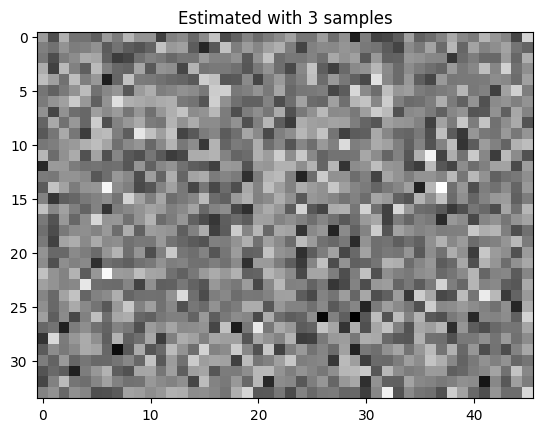

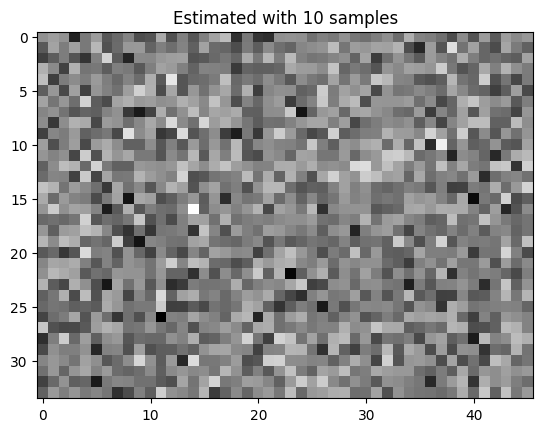

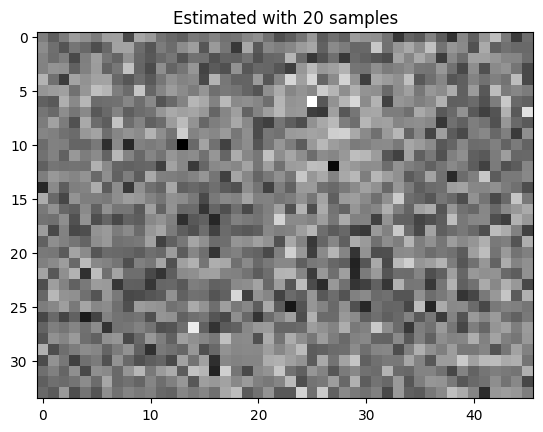

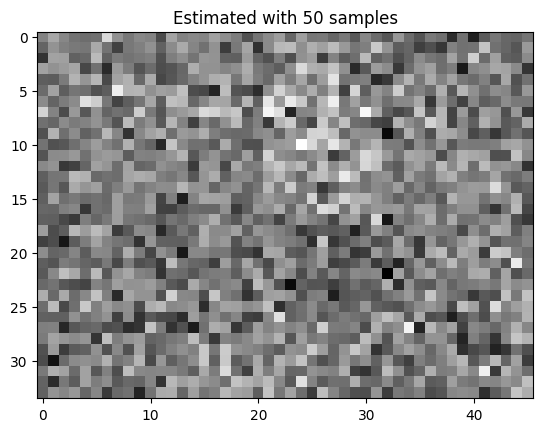

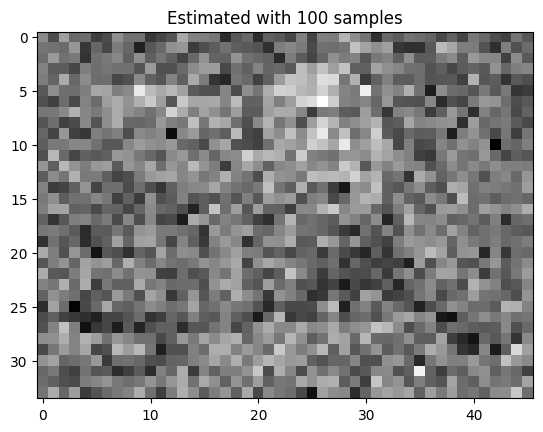

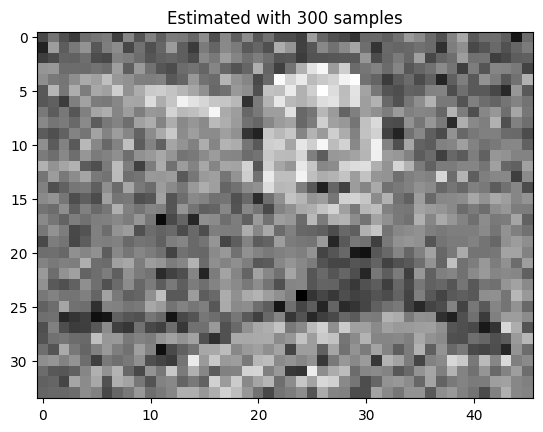

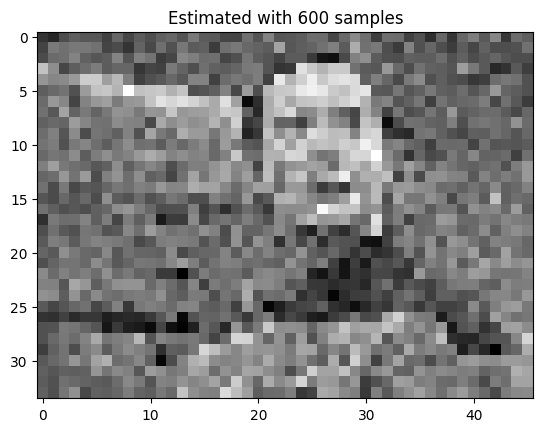

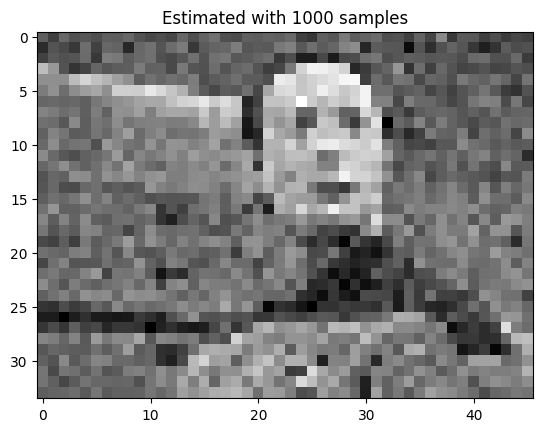

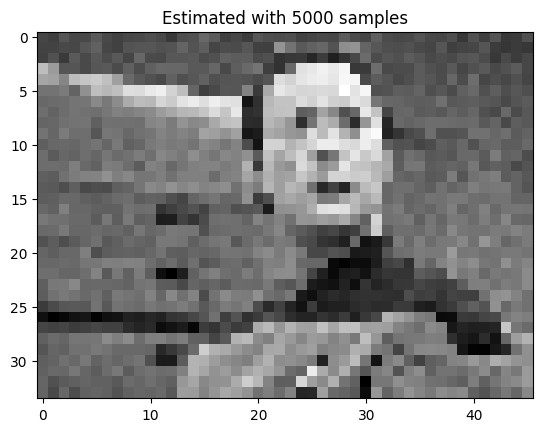

In [79]:
!wget https://sourceseparationresearch.com/static/mlsp_data/data.png
import torchvision
import numpy as np

out = torchvision.io.read_image('data.png')
im = out[:, ::20, ::20].float()

im = im.mean(0)
im = im / im.max()

##### travaillez ici
for N in [3, 10, 20, 50, 100, 300, 600, 1000, 5000]:
    noise=torch.randn(N,*im.shape) * 3
    # noise = np.random.normal(0, 3, (N, *im.shape))
    X=(im+noise).mean(dim=0)
    plt.figure()
    plt.title(f'Estimated with {N} samples')
    plt.imshow(X, cmap='gray')